In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
heart_data = pd.read_csv('heart_disease_uci.csv')

In [8]:
heart_data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [10]:
heart_data.info()
heart_data.info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


<bound method DataFrame.info of       id  age     sex        dataset               cp  trestbps   chol    fbs  \
0      1   63    Male      Cleveland   typical angina     145.0  233.0   True   
1      2   67    Male      Cleveland     asymptomatic     160.0  286.0  False   
2      3   67    Male      Cleveland     asymptomatic     120.0  229.0  False   
3      4   37    Male      Cleveland      non-anginal     130.0  250.0  False   
4      5   41  Female      Cleveland  atypical angina     130.0  204.0  False   
..   ...  ...     ...            ...              ...       ...    ...    ...   
915  916   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
916  917   62    Male  VA Long Beach   typical angina       NaN  139.0  False   
917  918   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
918  919   58    Male  VA Long Beach     asymptomatic       NaN  385.0   True   
919  920   62    Male  VA Long Beach  atypical angina     120.0  254.0  False

In [11]:
# Drop duplicate rows across all columns
heart_data = heart_data.drop_duplicates()

In [12]:
heart_data = heart_data.dropna()

In [18]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 748
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        299 non-null    int64  
 1   age                       299 non-null    int64  
 2   sex_Female                299 non-null    bool   
 3   sex_Male                  299 non-null    bool   
 4   dataset_Cleveland         299 non-null    bool   
 5   dataset_Hungary           299 non-null    bool   
 6   dataset_VA Long Beach     299 non-null    bool   
 7   cp_asymptomatic           299 non-null    bool   
 8   cp_atypical angina        299 non-null    bool   
 9   cp_non-anginal            299 non-null    bool   
 10  cp_typical angina         299 non-null    bool   
 11  trestbps                  299 non-null    float64
 12  chol                      299 non-null    float64
 13  fbs                       299 non-null    object 
 14  restecg_lv hype

In [17]:
# One-hot encode columns: 'sex', 'dataset' and 4 other columns
import pandas as pd
for column in ['sex', 'dataset', 'cp', 'restecg', 'slope', 'thal']:
    insert_loc = heart_data.columns.get_loc(column)
    heart_data = pd.concat([heart_data.iloc[:,:insert_loc], pd.get_dummies(heart_data.loc[:, [column]]), heart_data.iloc[:,insert_loc+1:]], axis=1)

In [22]:
# Scale numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
heart_data[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']] = scaler.fit_transform(heart_data[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']])
heart_data.head()

,id,age,sex_Female,sex_Male,dataset_Cleveland,dataset_Hungary,dataset_VA Long Beach,cp_asymptomatic,cp_atypical angina,cp_non-anginal,...,exang,oldpeak,slope_downsloping,slope_flat,slope_upsloping,ca,thal_fixed defect,thal_normal,thal_reversable defect,num
0,1,0.940446,False,True,True,False,False,False,False,False,...,False,1.069475,True,False,False,0.0,True,False,False,0
1,2,1.384143,False,True,True,False,False,True,False,False,...,True,0.380309,False,True,False,3.0,False,True,False,2
2,3,1.384143,False,True,True,False,False,True,False,False,...,True,1.327912,False,True,False,2.0,False,False,True,1
3,4,-1.943588,False,True,True,False,False,False,False,True,...,False,2.103224,True,False,False,0.0,False,True,False,0
4,5,-1.499891,True,False,True,False,False,False,True,False,...,False,0.294163,False,False,True,0.0,False,True,False,0


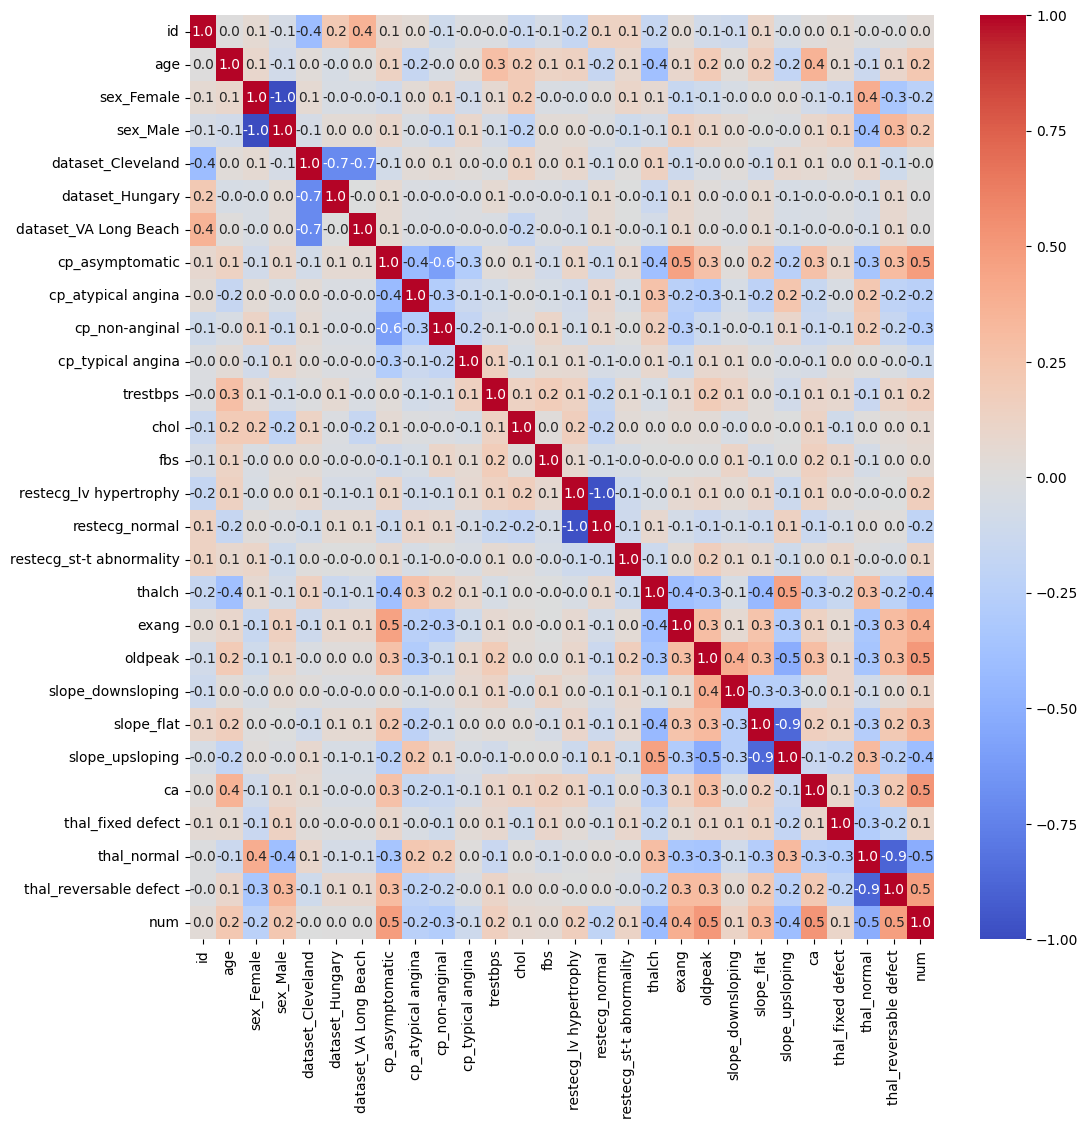

In [23]:
# Generate a correlation heatmap to analyze feature relationships.
plt.figure(figsize=(12, 12))
sns.heatmap(heart_data.corr(), annot=True, fmt='.1f', cmap='coolwarm')
plt.show()

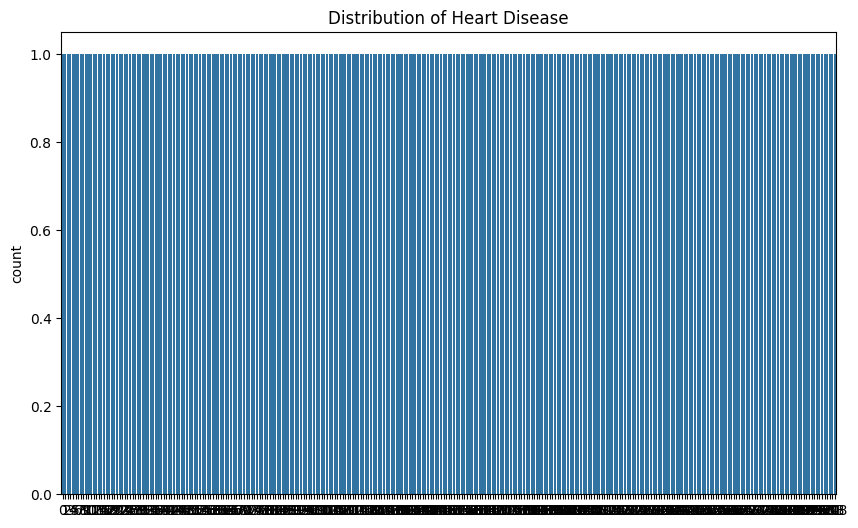

In [25]:
# Create at least one visualization to explore the dataset distribution
plt.figure(figsize=(10, 6))
sns.countplot(heart_data['num'])
plt.title('Distribution of Heart Disease')
plt.show()

In [26]:
# Split the data into features and target
X = heart_data.drop(columns='num')
y = heart_data['num']

In [27]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [28]:
# Train the following four models: Logistic Regression, Decision Tree, Random Forest, AdaBoost
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [29]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, y_pred)
log_reg_precision = precision_score(y_test, y_pred, average='weighted')
log_reg_recall = recall_score(y_test, y_pred, average='weighted')
log_reg_f1_score = f1_score(y_test, y_pred, average='weighted')

c:\Users\TEST\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
# Decision Tree
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
y_pred = dec_tree.predict(X_test)
dec_tree_accuracy = accuracy_score(y_test, y_pred)
dec_tree_precision = precision_score(y_test, y_pred, average='weighted')
dec_tree_recall = recall_score(y_test, y_pred, average='weighted')
dec_tree_f1_score = f1_score(y_test, y_pred, average='weighted')

In [31]:
# Random Forest
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)
y_pred = rand_forest.predict(X_test)
rand_forest_accuracy = accuracy_score(y_test, y_pred)
rand_forest_precision = precision_score(y_test, y_pred, average='weighted')
rand_forest_recall = recall_score(y_test, y_pred, average='weighted')
rand_forest_f1_score = f1_score(y_test, y_pred, average='weighted')

In [32]:
# AdaBoost
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train, y_train)
y_pred = ada_boost.predict(X_test)
ada_boost_accuracy = accuracy_score(y_test, y_pred)
ada_boost_precision = precision_score(y_test, y_pred, average='weighted')
ada_boost_recall = recall_score(y_test, y_pred, average='weighted')
ada_boost_f1_score = f1_score(y_test, y_pred, average='weighted')

c:\Users\TEST\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [33]:
# Use an ensemble approach (such as a Voting Classifier) to combine multiple models and improve accuracy.
from sklearn.ensemble import VotingClassifier
voting_classifier = VotingClassifier(estimators=[('lr', log_reg), ('dt', dec_tree), ('rf', rand_forest), ('ab', ada_boost)], voting='hard')
voting_classifier.fit(X_train, y_train)
y_pred = voting_classifier.predict(X_test)
voting_accuracy = accuracy_score(y_test, y_pred)
voting_precision = precision_score(y_test, y_pred, average='weighted')
voting_recall = recall_score(y_test, y_pred, average='weighted')
voting_f1_score = f1_score(y_test, y_pred, average='weighted')

c:\Users\TEST\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\TEST\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [34]:
# Evaluate all models using accuracy, precision, recall, and F1-score on the test set.
print('Logistic Regression:')
print(f'Accuracy: {log_reg_accuracy}')
print(f'Precision: {log_reg_precision}')
print(f'Recall: {log_reg_recall}')
print(f'F1 Score: {log_reg_f1_score}')
print('\n')

print('Decision Tree:')
print(f'Accuracy: {dec_tree_accuracy}')
print(f'Precision: {dec_tree_precision}')
print(f'Recall: {dec_tree_recall}')
print(f'F1 Score: {dec_tree_f1_score}')
print('\n')

print('Random Forest:')
print(f'Accuracy: {rand_forest_accuracy}')
print(f'Precision: {rand_forest_precision}')
print(f'Recall: {rand_forest_recall}')
print(f'F1 Score: {rand_forest_f1_score}')
print('\n')

print('AdaBoost:')
print(f'Accuracy: {ada_boost_accuracy}')
print(f'Precision: {ada_boost_precision}')
print(f'Recall: {ada_boost_recall}')
print(f'F1 Score: {ada_boost_f1_score}')
print('\n')

print('Voting Classifier:')
print(f'Accuracy: {voting_accuracy}')
print(f'Precision: {voting_precision}')
print(f'Recall: {voting_recall}')
print(f'F1 Score: {voting_f1_score}')
print('\n')

Logistic Regression:
Accuracy: 0.5833333333333334
Precision: 0.5435864435864436
Recall: 0.5833333333333334
F1 Score: 0.5599258710155671


Decision Tree:
Accuracy: 0.6166666666666667
Precision: 0.6328571428571428
Recall: 0.6166666666666667
F1 Score: 0.6175534991324465


Random Forest:
Accuracy: 0.6166666666666667
Precision: 0.5704273504273504
Recall: 0.6166666666666667
F1 Score: 0.5903694479036944


AdaBoost:
Accuracy: 0.5166666666666667
Precision: 0.5593390804597701
Recall: 0.5166666666666667
F1 Score: 0.5322751322751322


Voting Classifier:
Accuracy: 0.6166666666666667
Precision: 0.575982905982906
Recall: 0.6166666666666667
F1 Score: 0.5923174998517465




In [35]:
# Compare the individual models against the ensemble classifier and determine the best-performing model.
# Save the final model using joblib in a .pkl file.
import joblib
best_model = max(log_reg_accuracy, dec_tree_accuracy, rand_forest_accuracy, ada_boost_accuracy, voting_accuracy)
if best_model == log_reg_accuracy:
    joblib.dump(log_reg, 'best_model.pkl')
elif best_model == dec_tree_accuracy:
    joblib.dump(dec_tree, 'best_model.pkl')
elif best_model == rand_forest_accuracy:
    joblib.dump(rand_forest, 'best_model.pkl')
elif best_model == ada_boost_accuracy:
    joblib.dump(ada_boost, 'best_model.pkl')
else:
    joblib.dump(voting_classifier, 'best_model.pkl')
